In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,-48.3666687,49,1
0,-28.764718,32.895035,1
1,-57.652411,30.937698,1
2,-60.491484,59.372470,1
3,-39.366669,53.000000,1
4,-51.430453,71.764228,1
...,...,...,...
1031,109.982521,92.555199,0
1032,90.633331,-82.000000,0
1033,93.732641,-99.824137,0
1034,76.703768,-79.187814,0


In [4]:
df.nunique()

-48.3666687    931
49             921
1                2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -48.3666687  1036 non-null   float64
 1   49           1036 non-null   float64
 2   1            1036 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 24.4 KB


In [6]:
df.isnull().sum()

-48.3666687    0
49             0
1              0
dtype: int64

In [7]:
df.describe()

,-48.3666687,49,1
count,1036.000000,1036.000000,1036.000000
mean,-0.840071,7.150771,0.277027
std,74.697759,69.416254,0.447746
min,-134.736012,-134.645577,0.000000
25%,-62.253077,-43.174441,0.000000
50%,0.522257,14.847235,0.000000
75%,60.969410,57.000000,1.000000
max,133.602619,134.612405,1.000000


# No null data found

# EDA


<AxesSubplot:>

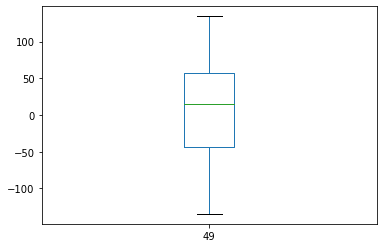

In [8]:
df['49'].plot(kind = 'box')

<AxesSubplot:>

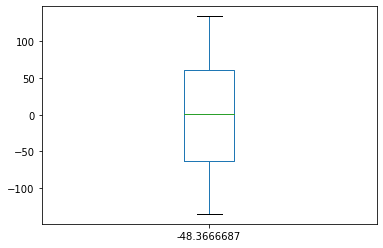

In [9]:
df["-48.3666687"].plot(kind="box")

In [10]:
df.columns

Index(['-48.3666687', '49', '1'], dtype='object')

<AxesSubplot:xlabel='-48.3666687', ylabel='49'>

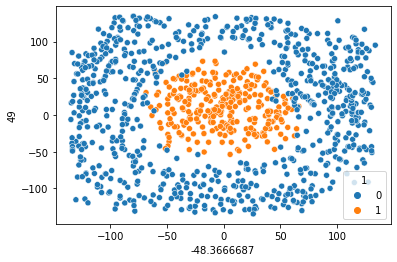

In [11]:
sns.scatterplot(x='-48.3666687', y='49',hue='1', data=df)

<AxesSubplot:xlabel='-48.3666687', ylabel='Density'>

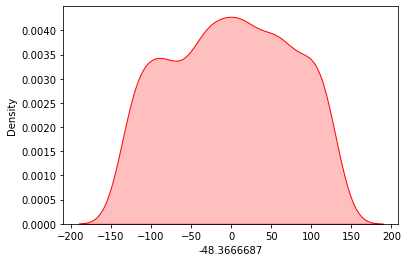

In [12]:
sns.kdeplot(df['-48.3666687'],shade=True,color="red")

# Model1: Logistic Regression

In [13]:
target = df['1']
data = df.drop("1",axis=1)

In [14]:
print(data.shape)
print(target.shape)

(1036, 2)
(1036,)


In [15]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(1036, 2)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, 
                                                   target, 
                                                   test_size = 0.25, 
                                                   random_state = 0)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
# calculate accuracy of class predictions
from sklearn import metrics
Logistic_Score=metrics.accuracy_score(y_test, y_pred)
Logistic_Score

0.7722007722007722

# Hyperparameter Tunning for Svm

In [20]:
from sklearn.svm import SVC

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [22]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(
    SVC(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.45700406354753875, 'C': 100}
SVC(C=100, gamma=0.45700406354753875)

0.9884169884169884


# Model3 SVM using kernel = Linear

In [23]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(X_train, y_train)#training
y_test_pred = clf.predict(X_test)#prediction on test data

In [24]:
Linear_SVM_Score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))#accuracy 

0.7722007722007722


#  Model2 SVM using kernel = RBF

In [25]:
from sklearn.svm import SVC
clf=SVC()#by default kernel value is rbf
clf.fit(X_train, y_train)#training
y_test_pred = clf.predict(X_test)#prediction on test data

In [26]:
RBF_SVM_Score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))#accuracy 

0.9922779922779923


# <b> We found that kernel with  "RBF" gives best result by hypertunning . <b>


# Model4 Decision Tree


In [27]:
X = df[['-48.3666687', '49']]
y = df['1']

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [29]:
#prediction
y_test_pred = classifier.predict(X_test)

In [30]:
# calculate accuracy of class predictions
from sklearn import metrics
Decision_Score1=metrics.accuracy_score(y_test, y_test_pred)
Decision_Score1

0.9652509652509652

In [31]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[196,   4],
       [  5,  54]], dtype=int64)

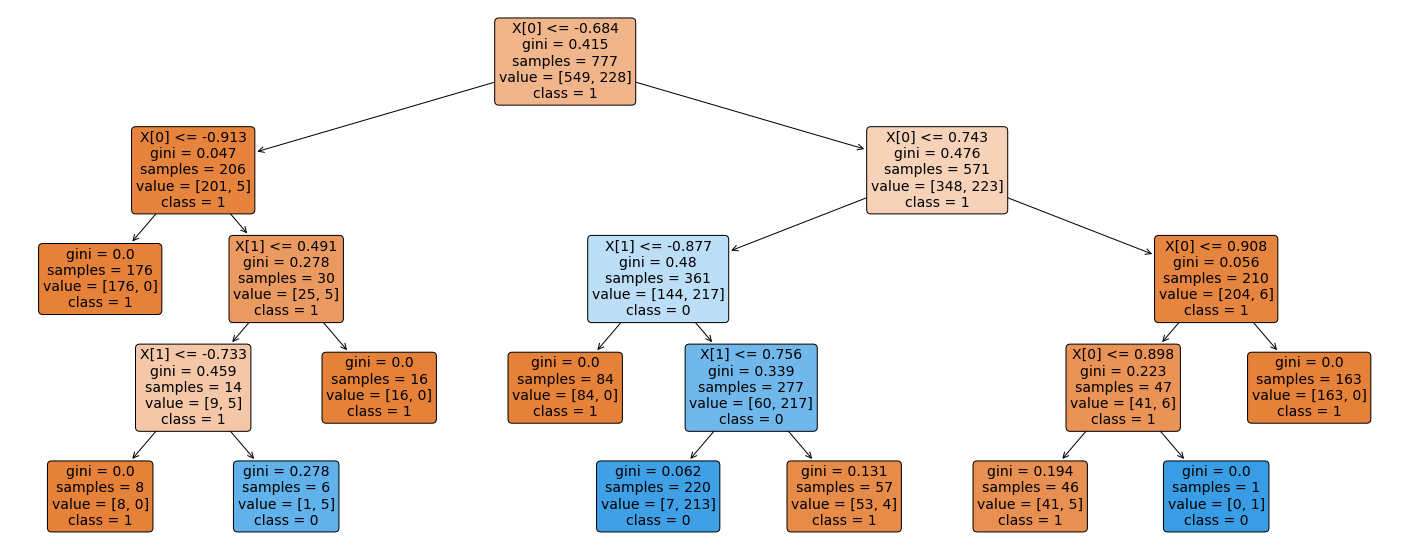

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier,
              class_names = ['1','0'], 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

# Hyper Parameter Tunning Decision Tree


In [33]:
dt = DecisionTreeClassifier(random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [36]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [37]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 9.01 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [38]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002874,1.671081e-03,0.000999,0.001730,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.758974,0.778351,0.737113,0.757732,0.758043,0.014589,41
1,0.001999,1.998901e-03,0.000999,0.001730,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.758974,0.778351,0.737113,0.757732,0.758043,0.014589,41
2,0.001998,1.997650e-03,0.000999,0.001731,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.758974,0.778351,0.737113,0.757732,0.758043,0.014589,41
3,0.003995,4.578320e-07,0.001997,0.001997,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.758974,0.778351,0.737113,0.757732,0.758043,0.014589,41
4,0.002996,1.729792e-03,0.000998,0.001729,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.758974,0.778351,0.737113,0.757732,0.758043,0.014589,41


In [39]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
15,0.004993,1.729344e-03,0.000000,0.000000,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.953846,0.958763,0.963918,0.984536,0.965266,0.011682,1
20,0.004993,1.729241e-03,0.000000,0.000000,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.953846,0.958763,0.963918,0.984536,0.965266,0.011682,1
41,0.002996,1.729482e-03,0.001998,0.001998,entropy,10,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.948718,0.969072,0.963918,0.958763,0.960118,0.007523,3
46,0.003995,6.165552e-07,0.000999,0.001730,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.948718,0.969072,0.963918,0.958763,0.960118,0.007523,3
10,0.003997,5.891822e-06,0.000869,0.001505,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.948718,0.963918,0.943299,0.984536,0.960118,0.015996,5


In [40]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [41]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [42]:
dt_best = grid_search.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
evaluate_model(dt_best)

Train Accuracy : 0.9819819819819819
Train Confusion Matrix:
[[544   5]
 [  9 219]]
--------------------------------------------------
Test Accuracy : 0.9691119691119691
Test Confusion Matrix:
[[197   3]
 [  5  54]]


In [44]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['0','1'],
                       filled=True)

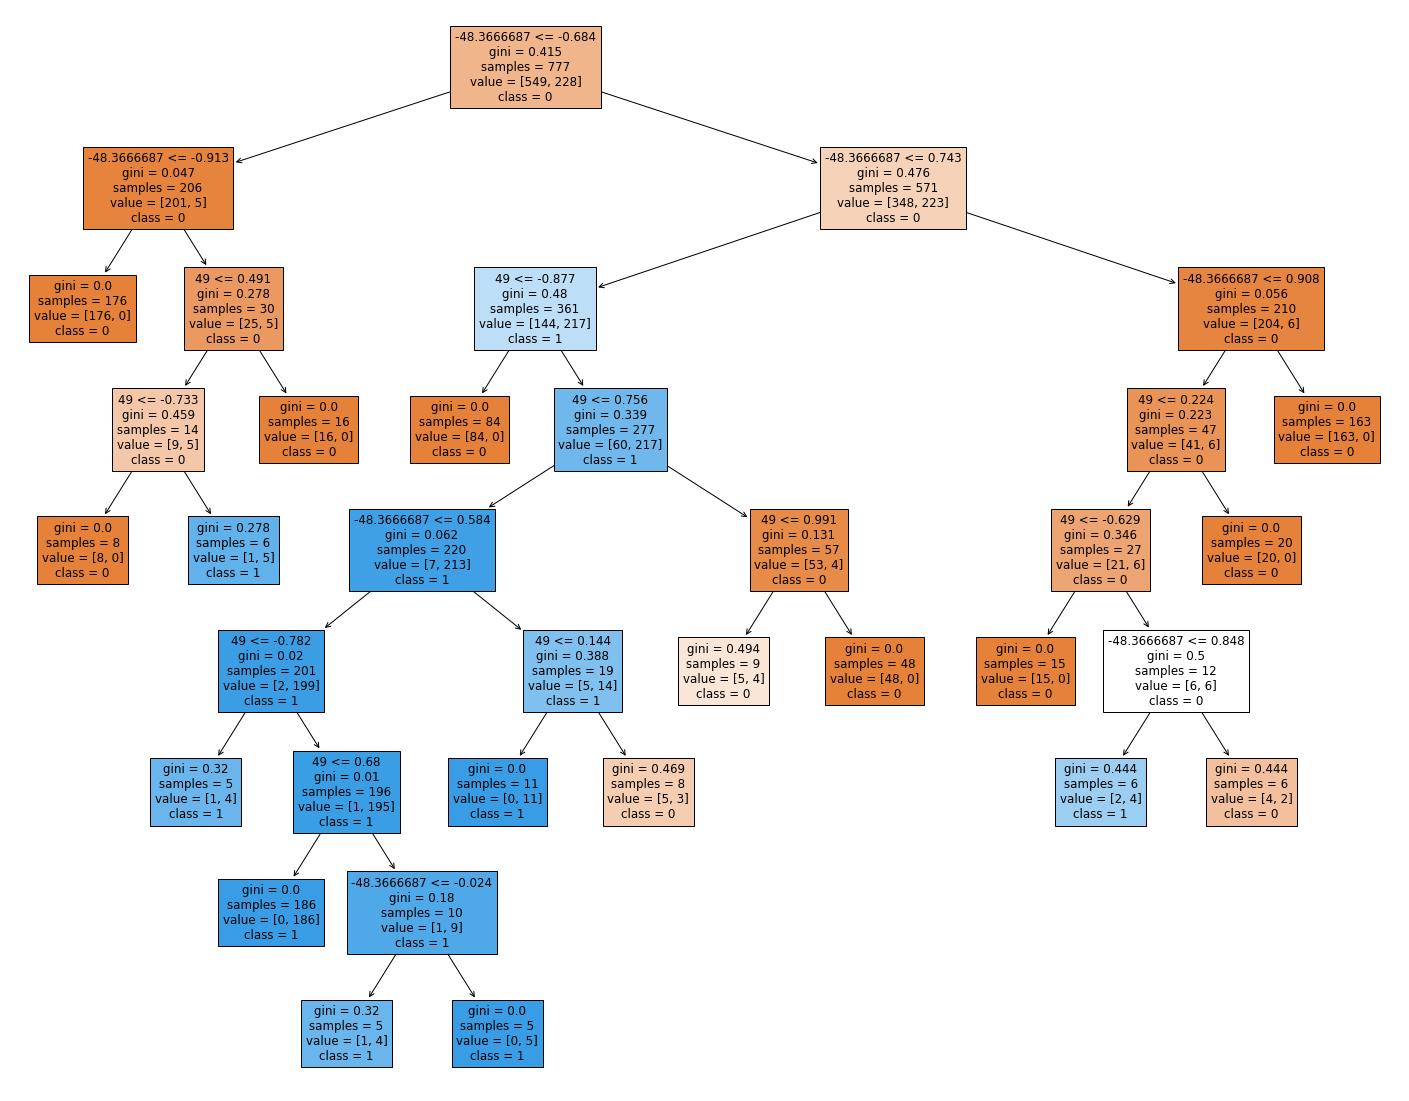

In [45]:
from sklearn import tree
get_dt_graph(dt_best)

# After Hyper Parameter Tunning Of Decision Tree


In [46]:
X = df[['-48.3666687', '49']]
y = df['1']

In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [48]:
#prediction
y_test_pred = classifier.predict(X_test)

In [49]:
# calculate accuracy of class predictions
from sklearn import metrics
Decision_Score=metrics.accuracy_score(y_test, y_test_pred)
Decision_Score

0.9691119691119691

In [50]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[195,   5],
       [  3,  56]], dtype=int64)

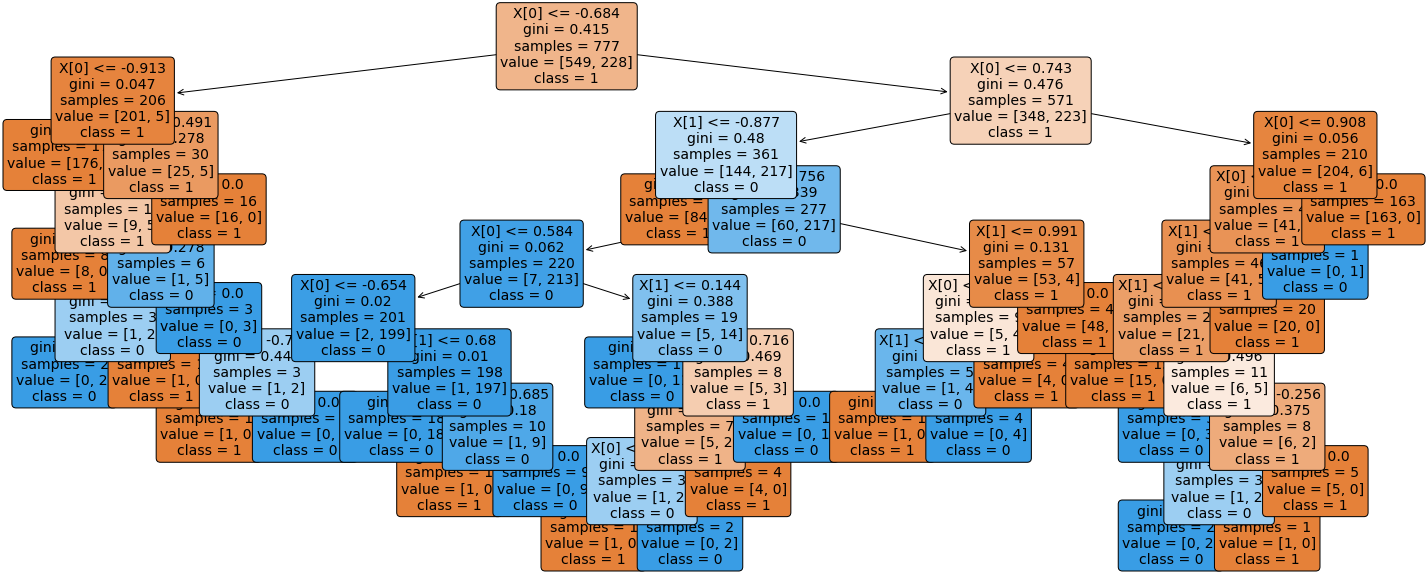

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier,
              class_names = ['1','0'], 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

# Model5 KNN


In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Tuning Hyperparameter for knn

In [54]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'n_neighbors': 3, 'p': 1}
KNeighborsClassifier(n_neighbors=3, p=1)

0.972972972972973


In [55]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

clf = RandomizedSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 1, 'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3, p=1)

0.972972972972973


# knn model

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, p=1)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3, p=1)

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
# calculate accuracy of class predictions
from sklearn import metrics
Knn_Score=metrics.accuracy_score(y_test, y_pred)
Knn_Score

0.972972972972973

In [59]:
COL=['LOG Regression','SVM_Linear','SVM_RBF','Decision_Tree','KNN']
data={"SCORE":[Logistic_Score,Linear_SVM_Score,RBF_SVM_Score,Decision_Score,Knn_Score]}
result=pd.DataFrame(data=data,index=COL)
result

,SCORE
LOG Regression,0.772201
SVM_Linear,0.772201
SVM_RBF,0.992278
Decision_Tree,0.969112
KNN,0.972973


# Conclusion:
# From all the model the best model having a score a 99% is SVM with RBF kernel.

### Explaination:-
### In the scatterplot we can observe that blue dots and orange dots are not seperable since we can not draw a line that can seperate these two class on different side.However we can seperate them drawing a circle in which orange points will be inside and blue points outside. 
### To perform that I have used the rbf kernel which is used to deal such problem where the problem is non linear data and rbf kernel transform it into a linear one within higher dimensional .